In [1]:
import json
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math
from collections import defaultdict
%matplotlib inline
from helper import *

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


Setting the font sizes for various items in plotting the figures

In [2]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#fig_path='/home/coepp18/psharma/Dropbox/Documents/My-Papers/Under-Preparation/Stefano/Interference/Manuscript/figs/'
fig_path='/home/pankaj/Dropbox/Documents/My-Papers/Under-Preparation/Stefano/Interference/Manuscript/figs/'

#data_path='/home/coepp18/psharma/Research/Events/BP5/'
data_path='/home/pankaj/Research/Stefano/Events/'

## Importing the data
- The data being imported corresponds to benchmark point BP5 for type II 2HDM,

   $$M_{H^+}=548~ \text{GeV},~ M_A=258~ \text{GeV},~ \tan\beta= 44,~ \sin(\beta-\alpha)=0.99$$ 
   
- twbb_sig.json -> signal events
- twbb_bck.json -> background events
- twbb_tot.json -> signal + background + interference events

In [3]:
dta=defaultdict(pd.DataFrame)
dta['sig'] = pd.read_json(data_path + 'twbb_sig.json',orient='records')
dta['bck'] = pd.read_json(data_path + 'twbb_bck.json',orient='records')
dta['tot'] = pd.read_json(data_path + 'twbb_tot.json',orient='records')

In [4]:
Mtop=173.2
MW=80.301
MHp=548.0 
MA=258.0
Gam_top=1.49
Gam_W=2.12
Gam_Hp=52.1
Gam_A=7.92

### CUT-1: Only one-lepton in the event.

In our signal, we have only one lepton in final state. This cut regarding only one lepton has already been implemented in the json data files.

In [5]:
Total_Events_Generated=500000
xsec_sig=742.0
xsec_bck=10430.0
xsec_tot=10720.0

n_sig_1=len(dta['sig'])
n_bck_1=len(dta['bck'])
n_tot_1=len(dta['tot'])

eff_sig_1=n_sig_1/Total_Events_Generated
eff_bck_1=n_bck_1/Total_Events_Generated
eff_tot_1=n_tot_1/Total_Events_Generated

xsec_sig_1 = eff_sig_1*xsec_sig
xsec_bck_1 = eff_bck_1*xsec_bck
xsec_tot_1 = eff_tot_1*xsec_tot
xsec_int_1 = xsec_tot_1 - xsec_bck_1 -xsec_sig_1

print('{:>45}{:>15}{:>14}{:>20}'.format('Signal','Background','Total','Interference'))
print('Number of events after Cut-1:{:15}{:15}{:15}'.format(n_sig_1,n_bck_1,n_tot_1))
print('Cross section after Cut-1:{:18}{:16}{:15}{:15}'.format(round(xsec_sig_1,2),
                                                         round(xsec_bck_1,2),
                                                         round(xsec_tot_1,2),
                                                         round(xsec_int_1,2)))

                                       Signal     Background         Total        Interference
Number of events after Cut-1:          77249          53835          53790
Cross section after Cut-1:            114.64          1123.0        1153.26         -84.38


## Data Cleaning
All those events which contain there nan values are removed from the event list. For this purpose, a function 'remove_nan_events()' is included in the helper.py module. This function takes the data files and returns cleaned data file, i.e., after all nan values have been removed and a list which give the event numbers which have been purged.

In [6]:
process=['sig','bck','tot']
deleted_events=defaultdict(list)
for e in process:
    dta[e],deleted_events[e]=remove_nan_events(dta[e])

### CUT-2: Cut on the number of jets in the event.

For our process, we expect at least 5 jets at the detector out of which 3 should be b-tagged and remaining are light jets. In the following cut, we just impose to have events where total number of jets are larger or equal to 5. Note that the a cut regarding only one lepton has already been implemented in the json data files.

In [7]:
for e in process:
    dta[e]=dta[e].loc[dta[e]['Jet'].map(len)>4,:]
    dta[e].reset_index(drop=True,inplace=True)

In [8]:
n_sig_2=len(dta['sig'])
n_bck_2=len(dta['bck'])
n_tot_2=len(dta['tot'])

eff_sig_2=n_sig_2/Total_Events_Generated
eff_bck_2=n_bck_2/Total_Events_Generated
eff_tot_2=n_tot_2/Total_Events_Generated

xsec_sig_2 = eff_sig_2*xsec_sig
xsec_bck_2 = eff_bck_2*xsec_bck
xsec_tot_2 = eff_tot_2*xsec_tot
xsec_int_2 = xsec_tot_2 - xsec_bck_2 -xsec_sig_2

print('{:>45}{:>15}{:>14}{:>20}'.format('Signal','Background','Total','Interference'))
print('Number of events after Cut-2:{:15}{:15}{:15}'.format(n_sig_2,n_bck_2,n_tot_2))
print('Cross section after Cut-2:{:18}{:16}{:15}{:15}'.format(round(xsec_sig_2,2),
                                                         round(xsec_bck_2,2),
                                                         round(xsec_tot_2,2),
                                                         round(xsec_int_2,2)))

                                       Signal     Background         Total        Interference
Number of events after Cut-2:          61767          32820          32933
Cross section after Cut-2:             91.66          684.63         706.08          -70.2


-----------------------------------------------------------------------------
### CUT-3: Cut on Scalar_HT (Scalar Sum of pT of all objects in an event)
$H_T$ is defined as $p_T^{\ell^+}+\sum{p_T^j}$
    
We first plot the $H_T$ distribution for the signal and background.    

In [9]:
MET=defaultdict(pd.DataFrame)
for e in process:
    MET[e]=dta[e]['Missing_ET'].apply(pd.Series)
    MET[e].columns=['pT','Eta','Phi']

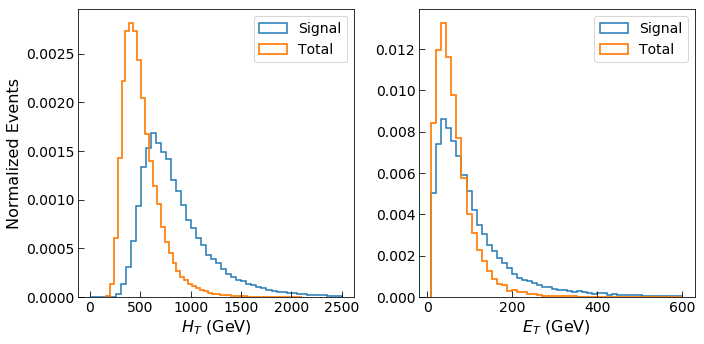

In [10]:
layout=(1,2)
fig=plt.figure(figsize=(10,5))

ax1=plt.subplot2grid(layout,(0,0))
_=ax1.hist(dta['sig']['Scalar_HT'],bins=50,histtype='step',normed=True,label='Signal',
           range=[10,2500],linewidth=1.5)
_=ax1.hist(dta['tot']['Scalar_HT'],bins=50,histtype='step',normed=True,label='Total',
           linewidth=1.75)
ax1.set_xlabel(r'$H_T$ (GeV)')
ax1.set_ylabel('Normalized Events')
ax1.tick_params(axis='both',direction='in',length=6)
ax1.legend()

ax1=plt.subplot2grid(layout,(0,1))
_=ax1.hist(MET['sig']['pT'],bins=50,histtype='step',normed=True,label='Signal',
           range=[10,600],linewidth=1.5)
_=ax1.hist(MET['tot']['pT'],bins=50,histtype='step',normed=True,label='Total',
           range=[10,600],linewidth=1.75)
ax1.set_xlabel(r'$E_T$ (GeV)')
ax1.tick_params(axis='both',direction='in',length=6)
ax1.legend()

plt.tight_layout()
plt.savefig(fig_path + 'HT_BP5.pdf')

In [11]:
for e in process:
    dta[e]=dta[e].loc[dta[e]['Scalar_HT']>500,:]
    dta[e].reset_index(drop=True,inplace=True)

In [12]:
n_sig_3=len(dta['sig'])
n_bck_3=len(dta['bck'])
n_tot_3=len(dta['tot'])

eff_sig_3=n_sig_3/Total_Events_Generated
eff_bck_3=n_bck_3/Total_Events_Generated
eff_tot_3=n_tot_3/Total_Events_Generated

xsec_sig_3 = eff_sig_3*xsec_sig
xsec_bck_3 = eff_bck_3*xsec_bck
xsec_tot_3 = eff_tot_3*xsec_tot
xsec_int_3 = xsec_tot_3 - xsec_bck_3 -xsec_sig_3

print('{:>45}{:>15}{:>14}{:>20}'.format('Signal','Background','Total','Interference'))
print('Number of events after Cut-3:{:15}{:15}{:15}'.format(n_sig_3,n_bck_3,n_tot_3))
print('Cross section after Cut-3:{:18}{:16}{:15}{:15}'.format(round(xsec_sig_3,2),
                                                         round(xsec_bck_3,2),
                                                         round(xsec_tot_3,2),
                                                         round(xsec_int_3,2)))

                                       Signal     Background         Total        Interference
Number of events after Cut-3:          56219          14414          14310
Cross section after Cut-3:             83.43          300.68         306.81          -77.3


In [13]:
Jet=defaultdict(lambda: defaultdict(pd.DataFrame))
for e in process:
    for i in range(1,6):
        Jet[str(i)][e]=jet_vars(dta[e],i-1)

In [14]:
Lepton=defaultdict(pd.DataFrame)
for e in process:
    Lepton[e]=dta[e]['Lepton'].apply(pd.Series)
    Lepton[e].columns=['pT','Eta','Phi','PId']
    Lepton[e]['E']=Lepton[e]['pT']*Lepton[e]['Eta'].map(math.cosh)
    Lepton[e].reindex(columns=['pT','Eta','Phi','E','PId'])

## Plotting the distributions
In the following, we use Dist_plot() function to plot the distributions for various objects in the events. Dist_plot() has been defined in helper.py module and it performs following tasks:
- The function takes inputs of list of four momenta corresponding to a object for a number of events for two different processes, i.e., signal and total in the following illustration
- It then plots distribution corresponding to transverse momentum $p_T$, pseudo-rapidity $\eta$ and Energy $E$ of the objects for each process

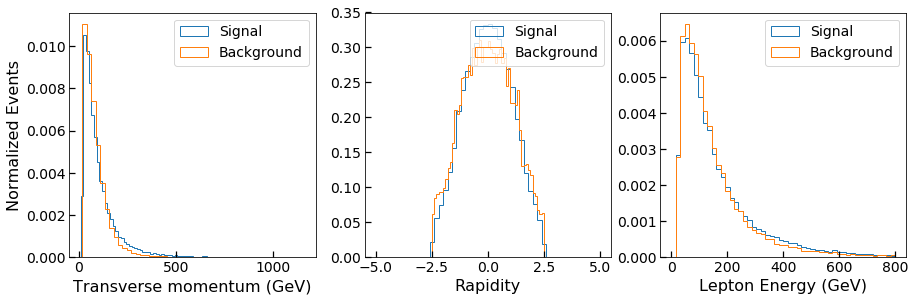

In [15]:
layout=(1,3)
fig=plt.figure(figsize=(15,4.5))

ax1=plt.subplot2grid(layout,(0,0))
_=ax1.hist(Lepton['sig']['pT'],bins=50,histtype='step',normed=True,label='Signal',range=[10,700])
_=ax1.hist(Lepton['bck']['pT'],bins=50,histtype='step',normed=True,label='Background')
ax1.set_xlabel('Transverse momentum (GeV)')
ax1.set_ylabel('Normalized Events')
ax1.tick_params(axis='both',direction='in',length=6,width=1.25)
ax1.legend()

ax2=plt.subplot2grid(layout,(0,1))
_=ax2.hist(Lepton['sig']['Eta'],bins=50,histtype='step',normed=True,label='Signal',range=[-5,5])
_=ax2.hist(Lepton['bck']['Eta'],bins=50,histtype='step',normed=True,label='Background')
ax2.set_xlabel('Rapidity')
ax2.tick_params(axis='both',direction='in',length=6,width=1.25)
ax2.legend()

#Plotting the Lepton energy figures
ax2=plt.subplot2grid(layout,(0,2))
_=ax2.hist(Lepton['sig']['E'],bins=50,histtype='step',normed=True,label='Signal',range=[0,800])
_=ax2.hist(Lepton['bck']['E'],bins=50,histtype='step',normed=True,label='Background',range=[0,800])
ax2.set_xlabel('Lepton Energy (GeV)')
ax2.tick_params(axis='both',direction='in',length=6,width=1.25)
ax2.legend()
plt.savefig(fig_path + 'Lep_BP5.pdf')

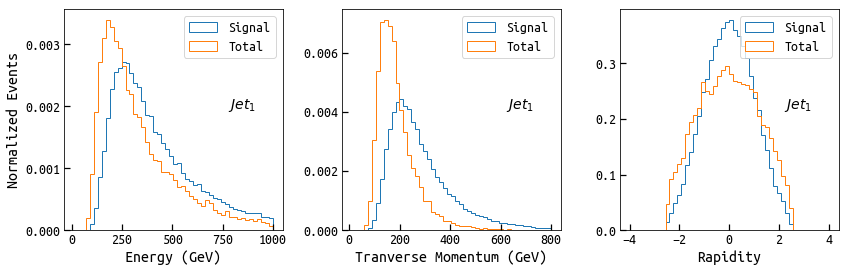

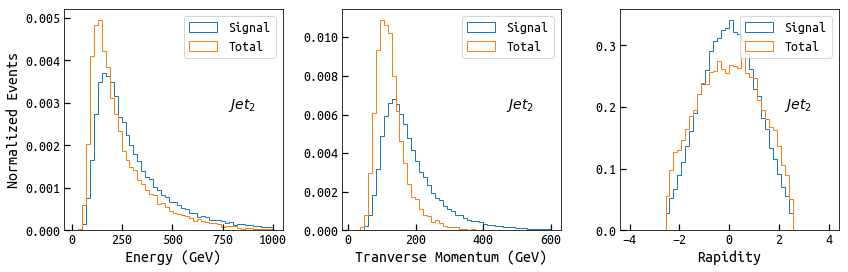

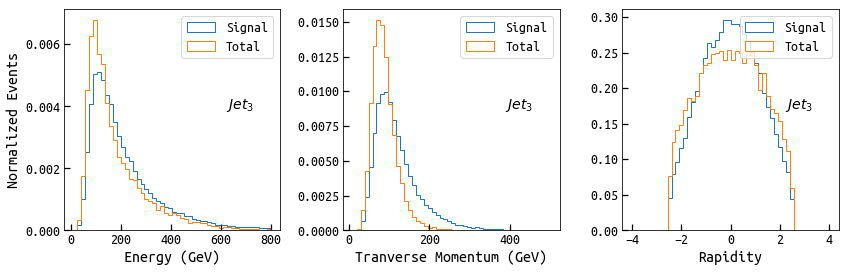

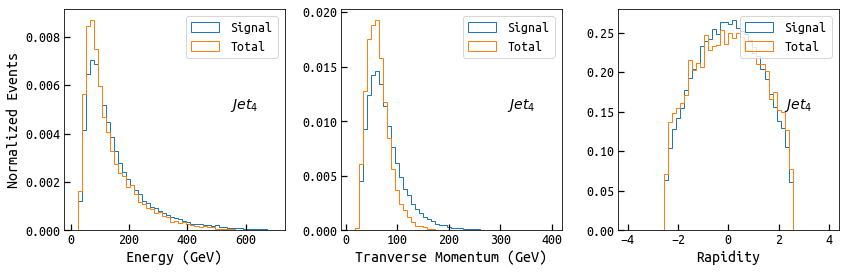

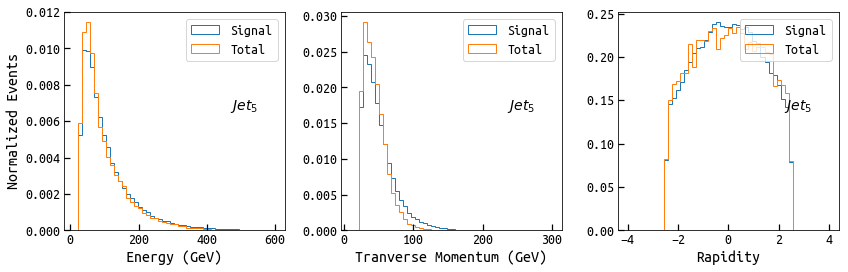

In [16]:
figsize=(12,4)
label_1=r'$Jet_1$'
range_1=[10,1000]
range_2=[10,800]

Dist_plot(Jet['1']['sig'],Jet['1']['tot'],figsize,label_1,range_1,range_2)
Dist_plot(Jet['2']['sig'],Jet['2']['tot'],(12, 4),r'$Jet_2$',[10,1000],[10,600])
Dist_plot(Jet['3']['sig'],Jet['3']['tot'],(12, 4),r'$Jet_3$',[10,800],[10,500])
Dist_plot(Jet['4']['sig'],Jet['4']['tot'],(12, 4),r'$Jet_4$',[10,700],[10,400])
Dist_plot(Jet['5']['sig'],Jet['5']['tot'],(12, 4),r'$Jet_5$',[10,600],[10,300])

In [17]:
DelR=defaultdict(pd.DataFrame)
for e in ['sig','bck','tot']:
    DelR[e]=pd.DataFrame({'DelR12':(Jet['1'][e]['Eta']-Jet['2'][e]['Eta']),   #1
                          'DelR13':(Jet['1'][e]['Eta']-Jet['3'][e]['Eta']),   #2
                          'DelR14':(Jet['1'][e]['Eta']-Jet['4'][e]['Eta']),   #3
                          'DelR15':(Jet['1'][e]['Eta']-Jet['5'][e]['Eta']),   #4
                          'DelR23':(Jet['2'][e]['Eta']-Jet['3'][e]['Eta']),   #5
                          'DelR24':(Jet['2'][e]['Eta']-Jet['4'][e]['Eta']),   #6
                          'DelR25':(Jet['2'][e]['Eta']-Jet['5'][e]['Eta']),   #7
                          'DelR34':(Jet['3'][e]['Eta']-Jet['4'][e]['Eta']),   #8
                          'DelR35':(Jet['3'][e]['Eta']-Jet['5'][e]['Eta']),   #9
                          'DelR45':(Jet['4'][e]['Eta']-Jet['5'][e]['Eta'])})  #10

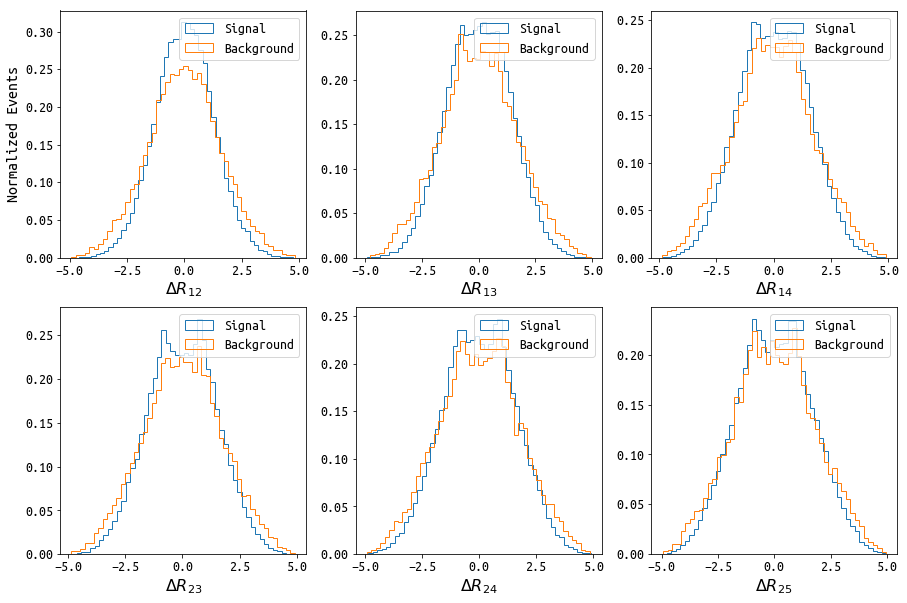

In [18]:
layout=(2,3)
fig=plt.figure(figsize=(15,10))

ax1=plt.subplot2grid(layout,(0,0))
_=ax1.hist(DelR['sig']['DelR12'],bins=50,histtype='step',normed=True,label='Signal')
_=ax1.hist(DelR['tot']['DelR12'],bins=50,histtype='step',normed=True,label='Background')
ax1.set_xlabel(r'$\Delta R_{12}$')
ax1.set_ylabel('Normalized Events')
ax1.legend()

ax2=plt.subplot2grid(layout,(0,1))
_=ax2.hist(DelR['sig']['DelR13'],bins=50,histtype='step',normed=True,label='Signal')
_=ax2.hist(DelR['tot']['DelR13'],bins=50,histtype='step',normed=True,label='Background')
ax2.set_xlabel(r'$\Delta R_{13}$')
ax2.legend()

ax3=plt.subplot2grid(layout,(0,2))
_=ax3.hist(DelR['sig']['DelR14'],bins=50,histtype='step',normed=True,label='Signal')
_=ax3.hist(DelR['tot']['DelR14'],bins=50,histtype='step',normed=True,label='Background')
ax3.set_xlabel(r'$\Delta R_{14}$')
ax3.legend()

ax4=plt.subplot2grid(layout,(1,0))
_=ax4.hist(DelR['sig']['DelR23'],bins=50,histtype='step',normed=True,label='Signal')
_=ax4.hist(DelR['tot']['DelR23'],bins=50,histtype='step',normed=True,label='Background')
ax4.set_xlabel(r'$\Delta R_{23}$')
ax4.legend()

ax5=plt.subplot2grid(layout,(1,1))
_=ax5.hist(DelR['sig']['DelR24'],bins=50,histtype='step',normed=True,label='Signal')
_=ax5.hist(DelR['tot']['DelR24'],bins=50,histtype='step',normed=True,label='Background')
ax5.set_xlabel(r'$\Delta R_{24}$')
ax5.legend()

ax6=plt.subplot2grid(layout,(1,2))
_=ax6.hist(DelR['sig']['DelR25'],bins=50,histtype='step',normed=True,label='Signal')
_=ax6.hist(DelR['tot']['DelR25'],bins=50,histtype='step',normed=True,label='Background')
ax6.set_xlabel(r'$\Delta R_{25}$')
ax6.legend()

### We now calculate the probability of tagging b-jets for first 5 hard jets in an event for signal and background processes.

In [19]:
b_tag_prob=defaultdict(list)

for e in process:
    for i in range(1,6):
        n_btag=0
        for j in range(len(Jet[str(i)][e])):
            if Jet[str(i)][e]['BTag'][j]==1.0:
                n_btag=n_btag + 1
        b_tag_prob[e].append(n_btag/len(Jet[str(i)][e]))

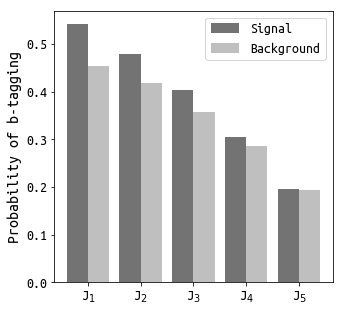

In [20]:
fig,ax=plt.subplots(figsize=(5,5))
num_of_jets=5
index=np.arange(num_of_jets)
width=0.4

ax.bar(index,b_tag_prob['sig'],width, alpha=0.55,color='black')
ax.bar(index+width,b_tag_prob['bck'],width,alpha=0.25,color='black')

ax.set_xticks(index+width/2.0 )
ax.set_xticklabels( (r'J$_1$', r'J$_2$', r'J$_3$', r'J$_4$', r'J$_5$'))
ax.set_ylabel('Probability of b-tagging')
ax.legend(('Signal','Background'))

## Calculating the longtudinal momentum of the missing neutrino

We make use of $W$ boson on-shell mass condition $M_{\ell\nu}^2=M_W^2$ to determine the longitudinal component of neutrino momentum ($p_Z^\nu$) in the events. This condition reuires solving a quadratic equation in $p_Z^\nu$ that results in two-fold ambiguity in the reconstruction of top quark. The longitudinal component of neutrino momentum ($p_Z^\nu$) is evaluated to be:
$$p_Z^\nu=\frac{1}{p_T^{e2}}\times A_Wp^e_z \pm E_e \sqrt{A_W^2-4(p_T^{e2}E_T^{\nu 2})}$$
where $A_W=M_W^2+2(p_x^e p_x^\nu + p_y^e p_y^\nu)$

In [21]:
MET=defaultdict(pd.DataFrame)
for e in process:
    MET[e]=dta[e]['Missing_ET'].apply(pd.Series)
    MET[e].columns=['pT','Eta','Phi']

In [22]:
import itertools
l1=range(5)
d = {frozenset([frozenset(x[:2]), frozenset(x[2:4]), x[-1]]) for x in itertools.permutations(l1, len(l1))}
d2 = [sorted(x,  key=lambda x: (not isinstance(x, frozenset), x)) for x in d]
d3 = sorted([[tuple(x[0]), tuple(x[1]), x[-1]] for x in d2])

d4=[[(0,1),(2,3,4)],[(0,2),(1,3,4)],[(0,3),(1,2,4)],[(0,4),(1,2,3)],[(1,2),(0,3,4)],[(1,3),(0,2,4)],[(1,4),(0,2,3)],
 [(2,3),(0,1,4)],[(2,4),(0,1,3)],[(3,4),(0,1,2)]]

### $\chi^2$ Template for the event reconstruction:

\begin{equation}
\chi^2_1=\frac{M_{\ell \nu}-M_W^2}{\Gamma_W^2}+\frac{M_{jj}-M_W^2}{\Gamma_W^2}+\frac{M_{\ell \nu j}-M_{top}^2}{\Gamma_{top}^2}+\frac{M_{jj}-M_A^2}{\Gamma_A^2}+\frac{M_{jjjj}-M_{H^\pm}^2}{\Gamma_{H^\pm}^2}
\end{equation}

\begin{equation}
\chi^2_2=\frac{M_{\ell \nu}-M_W^2}{\Gamma_W^2}+\frac{M_{jj}-M_W^2}{\Gamma_W^2}+\frac{M_{j j j}-M_{top}^2}{\Gamma_{top}^2}+\frac{M_{jj}-M_A^2}{\Gamma_A^2}+\frac{M_{\ell \nu jj}-M_{H^\pm}^2}{\Gamma_{H^\pm}^2}
\end{equation}

In [25]:
def get_long_mom_nu(proc,event_id):
    MW=80.301
    
    px_Nu=MET[proc]['pT'][event_id]*math.cos(MET[proc]['Phi'][event_id])
    py_Nu=MET[proc]['pT'][event_id]*math.sin(MET[proc]['Phi'][event_id])

    met=MET['sig']['pT'][event_id]

    px_lep=Lepton[proc]['pT'][event_id]*math.cos(Lepton[proc]['Phi'][event_id])
    py_lep=Lepton[proc]['pT'][event_id]*math.sin(Lepton[proc]['Phi'][event_id])
    pz_lep=Lepton[proc]['pT'][event_id]*math.sinh(Lepton[proc]['Eta'][event_id])
    E_lep =Lepton[proc]['pT'][event_id]*math.cosh(Lepton[proc]['Eta'][event_id])

    P_lep=math.sqrt(px_lep**2 + py_lep**2 + pz_lep**2)
    P_lep_T=Lepton[proc]['pT'][event_id]

    AW=MW**2 + 2.0*(px_lep*px_Nu + py_lep*py_Nu)
    Discrim=AW**2 - 4.0*(P_lep_T*met)**2

    pNu_p=[]
    pNu_m=[]
    if Discrim<0:
        Discrim = -Discrim
        
    pz_Nu_p=(0.5/(P_lep_T**2))*(AW*pz_lep + E_lep*math.sqrt(Discrim))
    pz_Nu_m=(0.5/(P_lep_T**2))*(AW*pz_lep - E_lep*math.sqrt(Discrim))

    E_Nu_p=math.sqrt(pz_Nu_p**2 + met**2)
    E_Nu_m=math.sqrt(pz_Nu_m**2 + met**2)

    pNu_p.extend([px_Nu,py_Nu,pz_Nu_p,E_Nu_p])
    pNu_m.extend([px_Nu,py_Nu,pz_Nu_m,E_Nu_m])
    
    return pNu_p,pNu_m


In [23]:
Masses=defaultdict(list)
Inv_Mass=defaultdict(pd.DataFrame)

In [26]:
for proc in process:
    for j in range(len(Lepton[proc])):
        p1,p2=get_long_mom_nu(proc,j)
       
        j1=to_cartesion(Jet['1'][proc].iloc[j,:])
        j2=to_cartesion(Jet['2'][proc].iloc[j,:])
        j3=to_cartesion(Jet['3'][proc].iloc[j,:])
        j4=to_cartesion(Jet['4'][proc].iloc[j,:])
        j5=to_cartesion(Jet['5'][proc].iloc[j,:])
        l1=to_cartesion(Lepton[proc].iloc[j,:])

        chi2=defaultdict(list)
        inv_mass=defaultdict(list)
        jets=[j1,j2,j3,j4,j5]
        for i in range(15):
            inv_mass[1].append(get_invariant_mass(jets[d3[i][0][0]],jets[d3[i][0][1]]))
            inv_mass[2].append(get_invariant_mass(jets[d3[i][1][0]],jets[d3[i][1][1]]))
            inv_mass[3].append(get_invariant_mass(jets[d3[i][0][0]],jets[d3[i][0][1]],jets[d3[i][1][0]],jets[d3[i][1][1]]))
            inv_mass[4].append(get_invariant_mass(jets[d3[i][2]],l1,p1))
            inv_mass[5].append(get_invariant_mass(jets[d3[i][2]],l1,p2))      
            
    #Hadronic charged Higgs and leptonic top
            chi2[1].append((inv_mass[1][i] - MW)**2/Gam_W**2 
                 + (inv_mass[2][i] - MA)**2/Gam_A**2 
                 + (inv_mass[3][i] - MHp)**2/Gam_Hp**2 
                 + (inv_mass[4][i] - Mtop)**2/Gam_top**2)

            chi2[2].append((inv_mass[1][i] - MA)**2/Gam_A**2 
                 + (inv_mass[2][i] - MW)**2/Gam_W**2 
                 + (inv_mass[3][i] - MHp)**2/Gam_Hp**2 
                 + (inv_mass[4][i] - Mtop)**2/Gam_top**2)

            chi2[3].append((inv_mass[1][i] - MW)**2/Gam_W**2 
                 + (inv_mass[2][i] - MA)**2/Gam_A**2 
                 + (inv_mass[3][i] - MHp)**2/Gam_Hp**2 
                 + (inv_mass[5][i] - Mtop)**2/Gam_top**2)

            chi2[4].append((inv_mass[1][i] - MA)**2/Gam_A**2 
                 + (inv_mass[2][i] - MW)**2/Gam_W**2 
                 + (inv_mass[3][i] - MHp)**2/Gam_Hp**2 
                 + (inv_mass[5][i] - Mtop)**2/Gam_top**2)
    
    #Leptonic Charged Higgs and Hadrnic top
    
    #Charged Higgs mass with m1 and p1
            inv_mass[6].append(get_invariant_mass(jets[d3[i][0][0]],jets[d3[i][0][1]],l1,p1))
        
    #Charged Higgs mass with m1 and p2
            inv_mass[7].append(get_invariant_mass(jets[d3[i][0][0]],jets[d3[i][0][1]],l1,p2))
        
    #Charged Higgs mass with m2 and p1
            inv_mass[8].append(get_invariant_mass(jets[d3[i][1][0]],jets[d3[i][1][1]],l1,p1))
        
    #Charged Higgs mass with m2 and p2
            inv_mass[9].append(get_invariant_mass(jets[d3[i][1][0]],jets[d3[i][1][1]],l1,p2))
        
    #Hadronic top mass with m1 and remaining jet
            inv_mass[10].append(get_invariant_mass(jets[d3[i][0][0]],jets[d3[i][0][1]],jets[d3[i][2]]))
        
    #Hadronic top mass with m2 and remaining jet
            inv_mass[11].append(get_invariant_mass(jets[d3[i][1][0]],jets[d3[i][1][1]],jets[d3[i][2]]))

            chi2[5].append((inv_mass[1][i]  - MA)**2/Gam_A**2 
                 + (inv_mass[2][i]  - MW)**2/Gam_W**2 
                 + (inv_mass[6][i]  - MHp)**2/Gam_Hp**2 
                 + (inv_mass[11][i] - Mtop)**2/Gam_top**2)

            chi2[6].append((inv_mass[1][i]  - MA)**2/Gam_A**2 
                 + (inv_mass[2][i]  - MW)**2/Gam_W**2 
                 + (inv_mass[7][i]  - MHp)**2/Gam_Hp**2 
                 + (inv_mass[11][i] - Mtop)**2/Gam_top**2)
    
            chi2[7].append((inv_mass[1][i]  - MW)**2/Gam_W**2 
                 + (inv_mass[2][i]  - MA)**2/Gam_A**2 
                 + (inv_mass[8][i]  - MHp)**2/Gam_Hp**2 
                 + (inv_mass[10][i] - Mtop)**2/Gam_top**2)

            chi2[8].append((inv_mass[1][i]  - MW)**2/Gam_W**2 
                 + (inv_mass[2][i]  - MA)**2/Gam_A**2 
                 + (inv_mass[9][i]  - MHp)**2/Gam_Hp**2 
                 + (inv_mass[10][i] - Mtop)**2/Gam_top**2)

        chi=[(k,min(v),chi2[k].index(min(v))) for k,v in chi2.items()]    
        chimin=min(chi,key=lambda t: t[1])

        if chimin[0]==1 and chimin[1]<1000:        
            Masses[j]=[inv_mass[1][chimin[2]],inv_mass[2][chimin[2]],inv_mass[3][chimin[2]],inv_mass[4][chimin[2]]]
        elif chimin[0]==2 and chimin[1]<1000:
            Masses[j]=[inv_mass[2][chimin[2]],inv_mass[1][chimin[2]],inv_mass[3][chimin[2]],inv_mass[4][chimin[2]]]
        elif chimin[0]==3 and chimin[1]<1000:
            Masses[j]=[inv_mass[1][chimin[2]],inv_mass[2][chimin[2]],inv_mass[3][chimin[2]],inv_mass[5][chimin[2]]]
        elif chimin[0]==4 and chimin[1]<1000:
            Masses[j]=[inv_mass[2][chimin[2]],inv_mass[1][chimin[2]],inv_mass[3][chimin[2]],inv_mass[5][chimin[2]]]
        elif chimin[0]==5 and chimin[1]<1000:
            Masses[j]=[inv_mass[2][chimin[2]],inv_mass[1][chimin[2]],inv_mass[6][chimin[2]],inv_mass[11][chimin[2]]]
        elif chimin[0]==6 and chimin[1]<1000:
            Masses[j]=[inv_mass[2][chimin[2]],inv_mass[1][chimin[2]],inv_mass[7][chimin[2]],inv_mass[11][chimin[2]]]
        elif chimin[0]==7 and chimin[1]<1000:
            Masses[j]=[inv_mass[1][chimin[2]],inv_mass[2][chimin[2]],inv_mass[8][chimin[2]],inv_mass[10][chimin[2]]]
        elif chimin[0]==8 and chimin[1]<1000:
            Masses[j]=[inv_mass[1][chimin[2]],inv_mass[2][chimin[2]],inv_mass[9][chimin[2]],inv_mass[10][chimin[2]]]

    Inv_Mass[proc]=pd.Series(Masses).apply(pd.Series)
#    print(chimin)

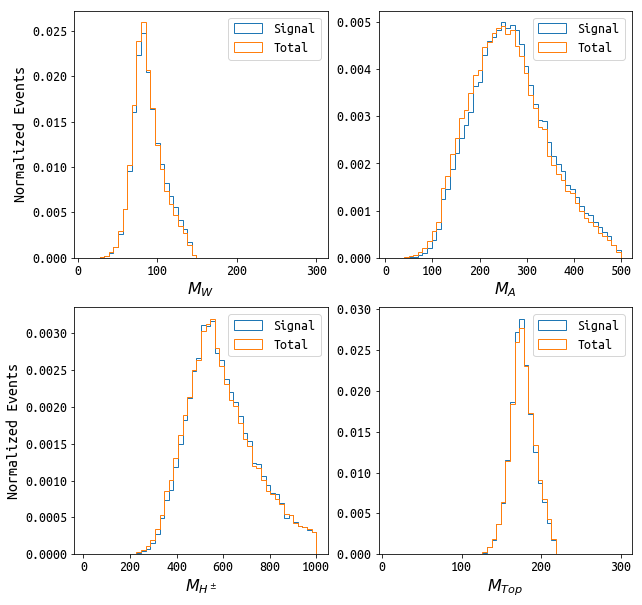

In [27]:
layout=(2,2)
fig=plt.figure(figsize=(10,10))

ax1=plt.subplot2grid(layout,(0,0))
_=ax1.hist(Inv_Mass['sig'][0],bins=50,histtype='step',normed=True,label='Signal',range=[10,300])
_=ax1.hist(Inv_Mass['tot'][0],bins=50,histtype='step',normed=True,label='Total',range=[10,300])
ax1.set_xlabel(r'$M_W$')
ax1.set_ylabel('Normalized Events')
ax1.legend()

ax1=plt.subplot2grid(layout,(0,1))
_=ax1.hist(Inv_Mass['sig'][1],bins=50,histtype='step',normed=True,label='Signal',range=[10,500])
_=ax1.hist(Inv_Mass['tot'][1],bins=50,histtype='step',normed=True,label='Total',range=[10,500])
ax1.set_xlabel(r'$M_A$')
ax1.legend()

ax1=plt.subplot2grid(layout,(1,0))
_=ax1.hist(Inv_Mass['sig'][2],bins=50,histtype='step',normed=True,label='Signal',range=[10,1000])
_=ax1.hist(Inv_Mass['tot'][2],bins=50,histtype='step',normed=True,label='Total',range=[10,1000])
ax1.set_xlabel(r'$M_{H^\pm}$')
ax1.set_ylabel('Normalized Events')
ax1.legend()

ax1=plt.subplot2grid(layout,(1,1))
_=ax1.hist(Inv_Mass['sig'][3],bins=50,histtype='step',normed=True,label='Signal',range=[10,300])
_=ax1.hist(Inv_Mass['tot'][3],bins=50,histtype='step',normed=True,label='Total',range=[10,300])
ax1.set_xlabel(r'$M_{Top}$')
ax1.legend()